# COVID-19 Data Analysis

## Overview

This notebook presents an analysis of COVID-19 trends using Bidirectional Long Short-Term Memory (BiLSTM) neural networks. The analysis focuses on three countries: China, the United States, and Lithuania. The following steps are performed in the notebook:

### 1. Data Import and Library Setup

The necessary libraries are imported, including pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, and Keras for building LSTM models. Additionally, MinMaxScaler is employed for data normalization.

### 2. Data Preprocessing Methods

Several methods for data selection, display, and visualization are defined, facilitating the exploration of specific countries and columns. The data is preprocessed using Min-Max scaling, and a method to create datasets with a specified look back is provided.

### 3. LSTM Model Creation and Training

An LSTM model is constructed with bidirectional layers and is trained using the WHO Covid-19 training data. The notebook includes separate training sessions for new Covid-19 cases and deaths.

### 4. Model Evaluation and Comparison

The notebook evaluates the trained models by comparing predicted values against actual data for each case. Plots are generated to visualize the performance of the models on training data.

### 5. Country-Specific Analysis

The notebook conducts detailed analyses for three countries:

- **China:** Analyzes trends in new cases, deaths.
- **United States:** Examines trends in new cases, deaths.
- **Lithuania:** Focuses on new cases, deaths.

### 6. Results Visualization

The results of the LSTM model predictions are visualized for each country, comparing the actual and predicted values for new cases, deaths.

## Model Performance on Training Data

The LSTM model performs well on the training data with the following parameters:

- **Epochs:** 300
- **Batch Size:** 12
- **Look Back:** 14
- **Learning Rate:** 0.001

## Data
Data is gathered from official WHO website: https://data.who.int/dashboards/covid19/data?n=c

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Some Important Methods

In [2]:
# Select and display data for a specific country from a DataFrame
def select_and_display_country_data(df, country):
    country_data = df[df['Country'] == country]
    print(f"Got the data for {country}:")
    return country_data

# Select and display specific columns from a DataFrame
def select_and_display_column_data(data, columns):
    selected_data = data[columns]
    print(f"{columns} data has been selected:")
    print(selected_data.head())
    return selected_data

# Plot line charts for the given data with a specified title
def plot_data(data, title):
    data.plot(kind='line', title=title)
    plt.show()

# Preprocess data using Min-Max scaling
def preprocess_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data, scaler

# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Create an LSTM model with specified parameters
def create_lstm_model(look_back=1, units=64, learning_rate=0.001):
    model = Sequential()
    model.add(Bidirectional(LSTM(units), input_shape=(1, look_back)))
    model.add(Dense(1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Create and fit the specified model with training data
def create_and_fit_model(model, trainX, trainY, epochs=150, batch_size=12):
    model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size)

# Make predictions using the provided model and input data, and invert the predictions using the scaler
def make_predictions(model, X, scaler):
    predictions = model.predict(X)
    inverted_predictions = scaler.inverse_transform(predictions)
    return inverted_predictions

# Plot actual and predicted values with a specified title
def plot_predictions(actual, predicted, title):
    plt.plot(actual.flatten(), label='Actual')
    plt.plot(predicted.flatten(), label='Predicted')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Loading the dataset

In [3]:
file_path = 'WHO-COVID-19-global-data.csv'
df = pd.read_csv(file_path)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0
4,2020-02-02,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
49915,2023-11-26,ZW,Zimbabwe,AFRO,48,265975,3,5730
49916,2023-12-03,ZW,Zimbabwe,AFRO,0,265975,0,5730
49917,2023-12-10,ZW,Zimbabwe,AFRO,0,265975,0,5730
49918,2023-12-17,ZW,Zimbabwe,AFRO,0,265975,0,5730


## Convert 'Date' column to datetime format

In [4]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

## Set 'Date' column as the index

In [5]:
df.set_index('Date_reported', inplace=True)

## Analysing Trends in China

In [6]:
china_data = select_and_display_country_data(df, 'China')
china_data.head()

Got the data for China:


,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-05,CN,China,WPRO,1,1,0,0
2020-01-12,CN,China,WPRO,44,45,1,1
2020-01-19,CN,China,WPRO,80,125,2,3
2020-01-26,CN,China,WPRO,1860,1985,53,56
2020-02-02,CN,China,WPRO,12426,14411,305,361


## Training for New cases

['New_cases'] data has been selected:
               New_cases
Date_reported           
2020-01-05             1
2020-01-12            44
2020-01-19            80
2020-01-26          1860
2020-02-02         12426


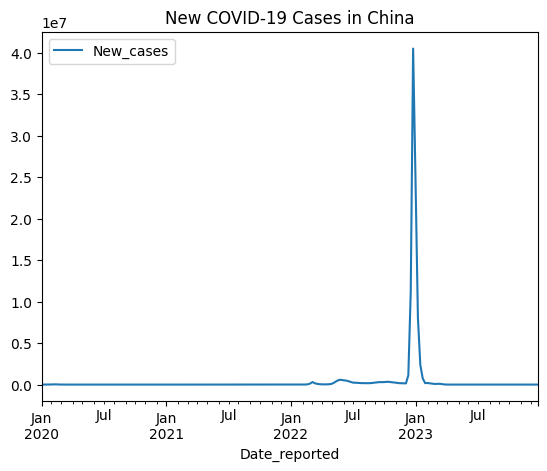

In [7]:
column_data = select_and_display_column_data(china_data, ['New_cases'])
plot_data(column_data, 'New COVID-19 Cases in China')

In [8]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [9]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [10]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 2ms/step - loss: 0.0077 
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 11/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 12/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 13/300
17/17 [================

## Comparing Model performance with real data

7/7 [==============================] - 1s 2ms/step


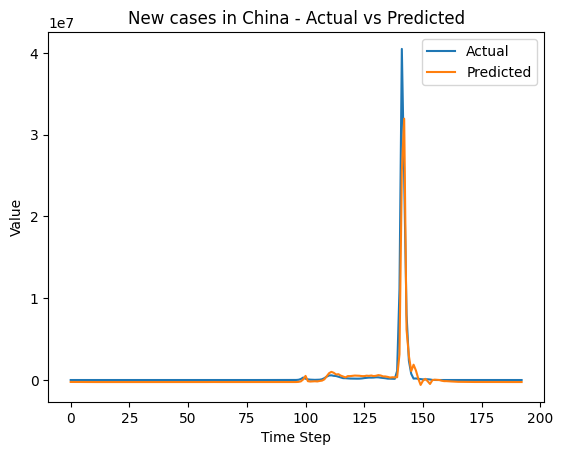

In [11]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'New cases in China - Actual vs Predicted')

In [12]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8498053752067242


## Training for New_deaths caused by Covid-19 in China

['New_deaths'] data has been selected:
               New_deaths
Date_reported            
2020-01-05              0
2020-01-12              1
2020-01-19              2
2020-01-26             53
2020-02-02            305


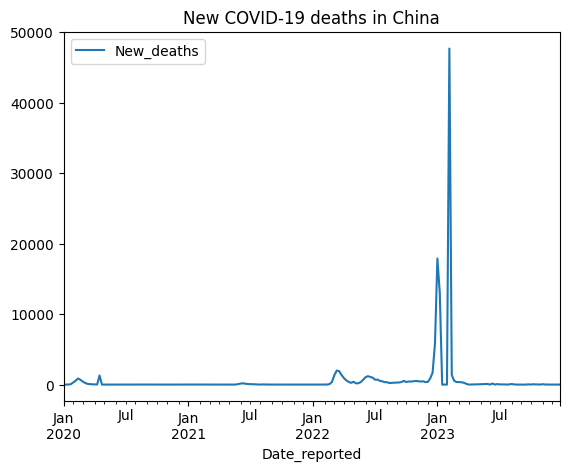

In [13]:
column_data = select_and_display_column_data(china_data, ['New_deaths'])


plot_data(column_data, 'New COVID-19 deaths in China')

In [14]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [15]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [16]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 2ms/step - loss: 0.0063 
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 8/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 9/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 10/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 11/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 12/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 13/300
17/17 [================

## Comparing Model Performance with real data

7/7 [==============================] - 1s 1ms/step


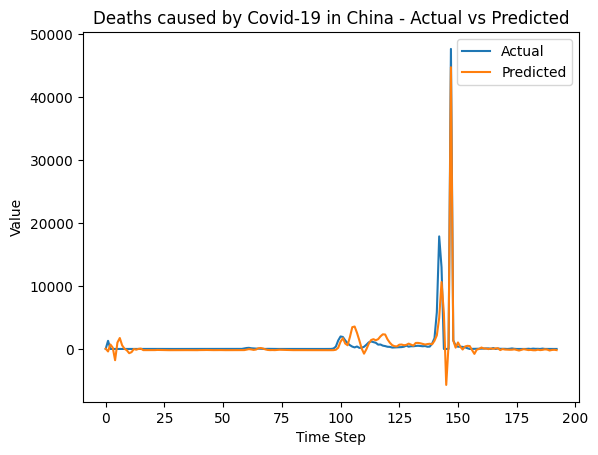

In [17]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'Deaths caused by Covid-19 in China - Actual vs Predicted')

In [18]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8820444630523182


# Going forward toward trends in United States

In [19]:
us_data = select_and_display_country_data(df, 'United States of America')
us_data.head()

Got the data for United States of America:


,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-05,US,United States of America,AMRO,0,0,0,0
2020-01-12,US,United States of America,AMRO,0,0,0,0
2020-01-19,US,United States of America,AMRO,0,0,0,0
2020-01-26,US,United States of America,AMRO,7,7,0,0
2020-02-02,US,United States of America,AMRO,2,9,0,0


## Training for New_cases caused by Covid-19 in US

['New_cases'] data has been selected:
               New_cases
Date_reported           
2020-01-05             0
2020-01-12             0
2020-01-19             0
2020-01-26             7
2020-02-02             2


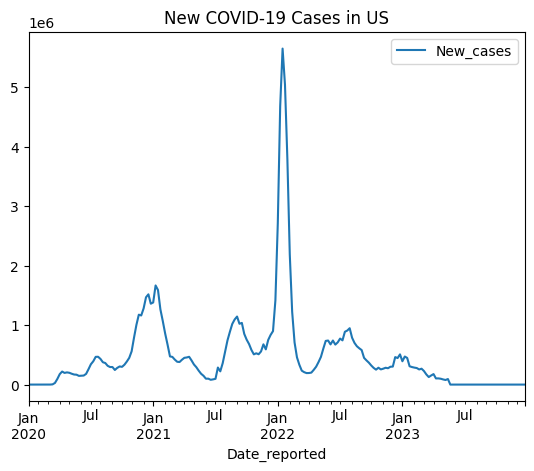

In [20]:
column_data = select_and_display_column_data(us_data, ['New_cases'])

plot_data(column_data, 'New COVID-19 Cases in US')

In [21]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [22]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [23]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 2ms/step - loss: 0.0178
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 11/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 12/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 13/300
17/17 [=================

## Comparing Model Performance with real data

7/7 [==============================] - 1s 1ms/step


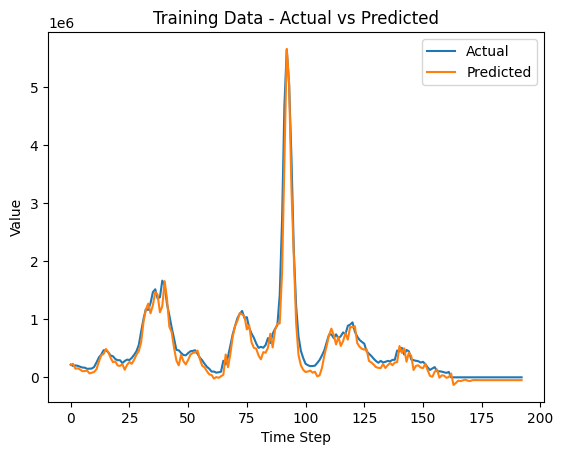

In [24]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'Training Data - Actual vs Predicted')

In [25]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.956173576158317


## Training for New_deaths caused by Covid-19 in US

['New_deaths'] data has been selected:
               New_deaths
Date_reported            
2020-01-05              0
2020-01-12              0
2020-01-19              0
2020-01-26              0
2020-02-02              0


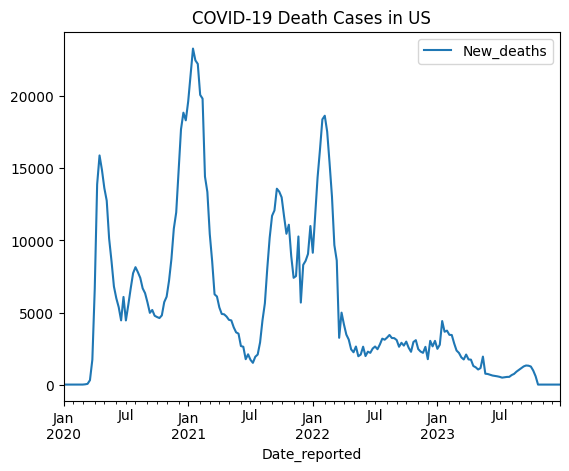

In [26]:
column_data = select_and_display_column_data(us_data, ['New_deaths'])


plot_data(column_data, 'COVID-19 Death Cases in US')

In [27]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [28]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [29]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 2ms/step - loss: 0.0601
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 4/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0156
Epoch 5/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 6/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 8/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 9/300
17/17 [==============================] - 0s 4ms/step - loss: 0.0082
Epoch 10/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 11/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 12/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 13/300
17/17 [=================

## Comparing Model Performance with real data

7/7 [==============================] - 1s 2ms/step


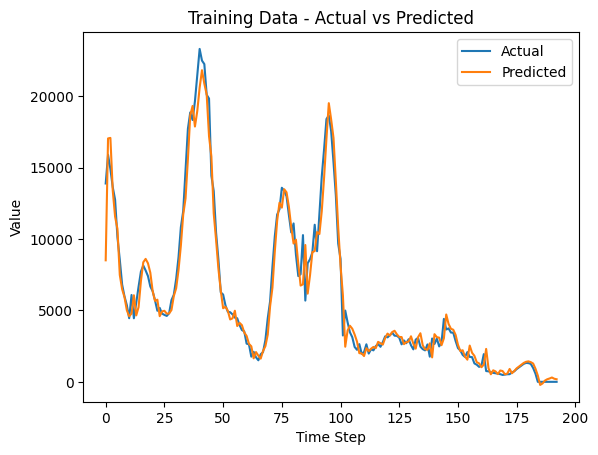

In [30]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'Training Data - Actual vs Predicted')

In [31]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9657727332648083


# Lastly We'll analyze trends in Lithuania

In [32]:
Lithuania_data = select_and_display_country_data(df, 'Lithuania')
Lithuania_data.head()

Got the data for Lithuania:


,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-05,LT,Lithuania,EURO,0,0,0,0
2020-01-12,LT,Lithuania,EURO,0,0,0,0
2020-01-19,LT,Lithuania,EURO,0,0,0,0
2020-01-26,LT,Lithuania,EURO,0,0,0,0
2020-02-02,LT,Lithuania,EURO,0,0,0,0


## Training model for New_deaths caused by Covid-19 in Lithuania

['New_cases'] data has been selected:
               New_cases
Date_reported           
2020-01-05             0
2020-01-12             0
2020-01-19             0
2020-01-26             0
2020-02-02             0


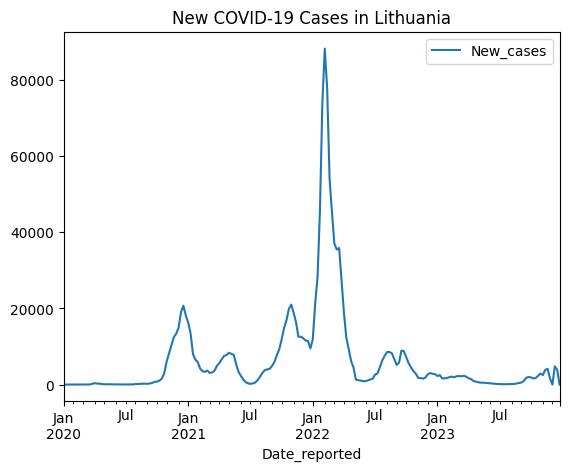

In [33]:
column_data = select_and_display_column_data(Lithuania_data, ['New_cases'])


plot_data(column_data, 'New COVID-19 Cases in Lithuania')

In [34]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [35]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [36]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 2ms/step - loss: 0.0183
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 4/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 5/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 6/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 8/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 9/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 10/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 11/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 12/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 13/300
17/17 [=================

7/7 [==============================] - 1s 2ms/step


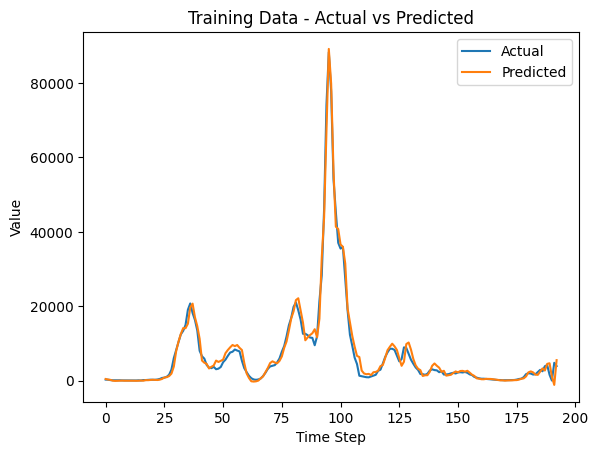

In [37]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'Training Data - Actual vs Predicted')

In [38]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9846170788547949


## Training for New_deaths caused by Covid-19 using Lithuania data

['New_deaths'] data has been selected:
               New_deaths
Date_reported            
2020-01-05              0
2020-01-12              1
2020-01-19              2
2020-01-26             53
2020-02-02            305


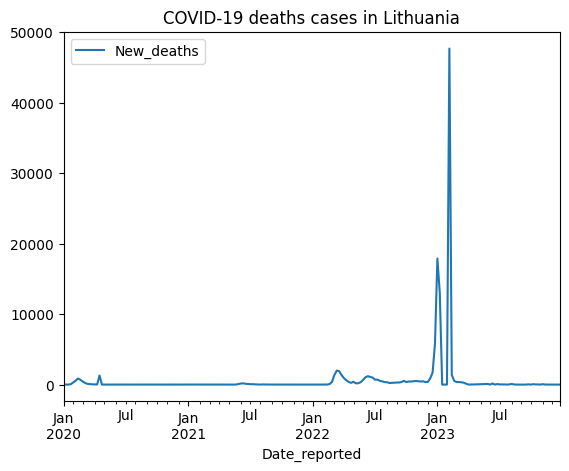

In [39]:
column_data = select_and_display_column_data(china_data, ['New_deaths'])

plot_data(column_data, 'COVID-19 deaths cases in Lithuania')

In [40]:
normalized_data, scaler = preprocess_data(column_data)
train = normalized_data

In [41]:
look_back = 14
trainX, trainY = create_dataset(train, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [42]:
model = create_lstm_model(look_back=look_back, learning_rate=0.001)
create_and_fit_model(model, trainX, trainY, epochs=300, batch_size=12)

Epoch 1/300
17/17 [==============================] - 4s 3ms/step - loss: 0.0064
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 10/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 11/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 12/300
17/17 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 13/300
17/17 [=================

## Comparing Model Performance with real data

7/7 [==============================] - 1s 2ms/step


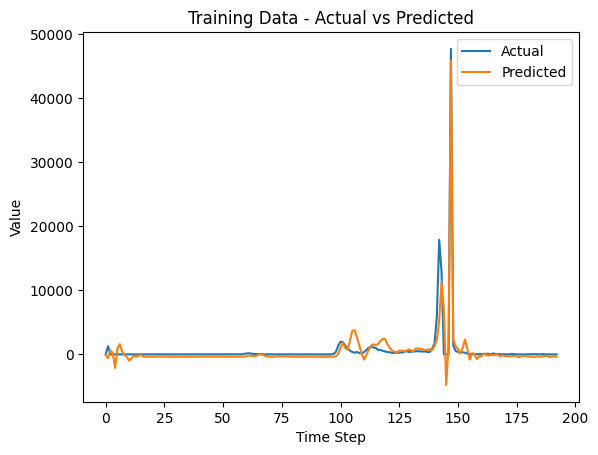

In [43]:
trainPredict = make_predictions(model, trainX, scaler)
trainY = scaler.inverse_transform([trainY])

plot_predictions(trainY, trainPredict, 'Training Data - Actual vs Predicted')

In [44]:
from sklearn.metrics import r2_score

# Assuming trainY is the actual values and trainPredict is the predicted values
r2 = r2_score(trainY.flatten(), trainPredict.flatten())
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8766721216874145
